In [19]:
import pandas as pd
import numpy as np

In [20]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv(r'C:\Users\ende\Downloads\Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [21]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns



def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]



In [22]:
 missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [23]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The dataset contains 12.5 % missing values.


In [24]:
# drop columns with more than 30% missing values
df_clean=db.dropna()
df_clean.shape

(17558, 55)

In [25]:
# drop columns with more than 30% missing values
#df_clean = db.drop(['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name','Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','DL TP < 50 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','HTTP DL (Bytes)','HTTP UL (Bytes)','Handset Manufacturer','Handset Type','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'], axis=1)
#df_clean.shape

In [26]:
percent_missing(df_clean)

The dataset contains 0.0 % missing values.


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 11 to 149990
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 17558 non-null  float64
 1   Start                                     17558 non-null  object 
 2   Start ms                                  17558 non-null  float64
 3   End                                       17558 non-null  object 
 4   End ms                                    17558 non-null  float64
 5   Dur. (ms)                                 17558 non-null  float64
 6   IMSI                                      17558 non-null  float64
 7   MSISDN/Number                             17558 non-null  float64
 8   IMEI                                      17558 non-null  float64
 9   Last Location Name                        17558 non-null  object 
 10  Avg RTT DL (ms)                 

### Converting to the appropriate data types

In [28]:
#df1=df_clean[['Bearer Id','IMSI','IMEI','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']]

In [29]:
#df2=df_clean[['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)']]

In [30]:
df_clean[['Bearer Id','IMSI','MSISDN/Number','IMEI','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']]=df_clean[['Bearer Id','IMSI','IMEI','MSISDN/Number','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']].astype('int64')

In [31]:
df_clean[['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)']]=df_clean[['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)']].astype('datetime64[ns]')

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 11 to 149990
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Bearer Id                                 17558 non-null  int64         
 1   Start                                     17558 non-null  datetime64[ns]
 2   Start ms                                  17558 non-null  datetime64[ns]
 3   End                                       17558 non-null  datetime64[ns]
 4   End ms                                    17558 non-null  datetime64[ns]
 5   Dur. (ms)                                 17558 non-null  datetime64[ns]
 6   IMSI                                      17558 non-null  int64         
 7   MSISDN/Number                             17558 non-null  int64         
 8   IMEI                                      17558 non-null  int64         
 9   Last Location Name        

In [33]:
df_clean.describe()

,Bearer Id,IMSI,MSISDN/Number,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,17558.000000,17558.000000,1.755800e+04,1.755800e+04,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,17558.000000,1.755800e+04,17558.000000,1.755800e+04,1.755800e+04,1.755800e+04,17558.000000,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04,1.755800e+04
mean,-2.349924e+18,2.082016e+14,6.657457e+13,3.368054e+10,48858.641531,11080.232999,4.126898e+07,1.916497e+06,77.615959,8.439856,5.691651,6.257376,94.184645,2.909329,0.857900,0.574838,2.744579e+08,8.053744e+06,8.743356e+06,6.876325e+06,8.213013e+07,1779.737556,701.265634,1457.492482,165.477902,1753.322246,258.256464,15215.804477,17026.628716,1.792496e+06,32995.564358,5.749420e+06,2.057369e+06,1.787349e+06,468142.132931,1.171990e+07,1.104661e+07,1.168226e+07,1.107134e+07,4.218381e+08,8.317698e+06,4.247357e+08,8.223797e+06,4.121795e+07,4.545695e+08
std,8.131050e+18,1.018220e+09,2.480766e+13,4.378255e+07,29866.061423,8199.284662,2.616483e+08,4.598129e+07,14.699359,6.652584,5.809749,7.869456,8.896298,5.260691,3.764743,3.425869,1.381899e+09,3.252010e+07,1.107900e+07,9.479099e+06,4.505748e+07,3375.238924,2057.698950,2387.373023,1290.585550,2268.294101,1390.823580,13444.477109,15450.776656,1.033271e+06,19099.520303,3.303525e+06,1.193235e+06,1.040625e+06,271330.781950,6.738608e+06,6.351623e+06,6.708762e+06,6.318829e+06,2.455078e+08,4.795778e+06,2.415153e+08,4.763249e+06,1.125153e+07,2.456590e+08
min,-9.223372e+18,2.082001e+14,1.341200e+12,3.360101e+10,5242.000000,3146.000000,3.500000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000e+01,1.040000e+02,2.767000e+04,3.518600e+04,8.125275e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,81.000000,4.840000e+02,1.000000,1.324000e+03,3.250000e+02,1.400000e+02,49.000000,1.156000e+03,2.970000e+02,9.640000e+02,2.430000e+02,6.859400e+04,7.900000e+01,5.995600e+04,2.150000e+02,4.661082e+06,7.114041e+06
25%,-9.223372e+18,2.082014e+14,3.572871e+13,3.365918e+10,28389.500000,4899.000000,6.485970e+05,1.546050e+04,70.000000,4.000000,2.000000,1.000000,94.000000,1.000000,0.000000,0.000000,4.196658e+06,4.190042e+05,1.766472e+06,1.530646e+06,7.420716e+07,142.000000,86.000000,198.000000,3.000000,409.000000,8.000000,5164.500000,5387.250000,8.967062e+05,16491.250000,2.863753e+06,1.023456e+06,8.772650e+05,231952.500000,5.867095e+06,5.526318e+06,5.866831e+06,5.612121e+06,2.073835e+08,4.134870e+06,2.175323e+08,4.145057e+06,3.325642e+07,2.398442e+08
50%,-9.223372e+18,2.082017e+14,8.637690e+13,3.366469e+10,42733.500000,8283.000000,2.804230e+06,5.466400e+04,80.000000,7.000000,4.000000,4.000000,97.000000,1.000000,0.000000,0.000000,3.336022e+07,1.787009e+06,4.531557e+06,3.483856

### Answering the questions

In [34]:
#top 10 handsets

In [35]:
df_clean['Handset Type'].value_counts()

Huawei B528S-23A                                  8839
Huawei E5180                                       797
Apple iPhone 7 (A1778)                             523
Apple iPhone Xr (A2105)                            513
Apple iPhone 6S (A1688)                            507
                                                  ... 
Apple iPad Mini 4 (A1550)                            1
Netgear Inc Nighthawk Ac1900 Cat 6 Lte Gateway       1
Apple iPhone 6S Plus (A1699)                         1
Samsung Galaxy J1 (Sm-J120X)                         1
New-Bund Technol. Thor                               1
Name: Handset Type, Length: 347, dtype: int64

In [43]:
from matplotlib import pyplot as plt

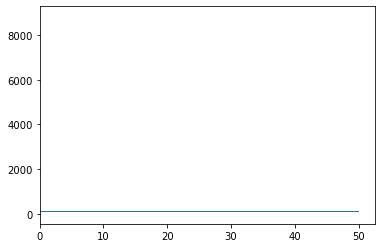

In [46]:
plt.barh(df_clean[['Handset Manufacturer','Handset Type']].value_counts(),50)
plt.show()

In [41]:
df_clean[['Handset Manufacturer','Handset Type']].value_counts()

Handset Manufacturer                  Handset Type                                       
Huawei                                Huawei B528S-23A                                       8839
                                      Huawei E5180                                            797
Apple                                 Apple iPhone 7 (A1778)                                  523
                                      Apple iPhone Xr (A2105)                                 513
                                      Apple iPhone 6S (A1688)                                 507
                                                                                             ... 
Oneplus Technology (Shenzhen) Co Ltd  Oneplus Technolo. One A1001 Oneplus A0001 One A0001       1
                                      Oneplus Technolo. One A2003                               1
                                      Oneplus Technolo. Oneplus 3                               1
Oppo                        

### Cleaning inconsistent labels column

In [38]:
df_clean['Handset Manufacturer']

11           Huawei
20           Huawei
68          Samsung
78          Samsung
84           Huawei
            ...    
149935       Huawei
149951       Huawei
149968    undefined
149973       Huawei
149990        Apple
Name: Handset Manufacturer, Length: 17558, dtype: object